# Noteboook for SRB times analysis
Goals:
- removal of short interruptions between two events
- removal of too short events afterwards (it has to last at least given amount of time in order not to be just an accidental movment synchro)
- plotting the distribution of time differences in between all of those events before and after times analysis
- SRB head retractoins in given <t0, t1> detection

Approach:
- start by detecting SRB with new bounds 
- dtime in between detected events
- distplot
- limitations
- distplot

*work on: single sample -> handpicked srb -> more general approach

In [1]:
# data loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, integrate

%matplotlib inline
sns.set(color_codes=True)

path = '../datasets/preprocessed/'
dfrat     = pd.read_hdf(path+'relationalDatabase.h5', 'Rat_Behavior').set_index('index')
dfevent   = pd.read_hdf(path+'relationalDatabase.h5', 'Events').set_index('index')
dfsession = pd.read_hdf(path+'relationalDatabase.h5', 'Sessions')

dfratclean = pd.read_hdf(path+'filteredDatabase.h5', 'Rat_Behavior').set_index('index')
dfratv = pd.read_hdf(path+'velocityDatabase.h5', 'Rat_Behavior').set_index('index')

In [2]:
df = pd.merge(dfratv, dfevent, on=['Frame', 'session_id','Time'])
df['subU'] = df['speed'] - df['U'] 
df['subUM'] = df['speed'] - df['UM'] 

In [3]:
dfSRB7 = pd.DataFrame()
dd7 = df[df['session_id']==7]

In [4]:
# # 225, 230
# dpart = dd7[(dd7['Time']>225.5) & (dd7['Time']<230)]
# xmin, xmax = 226, 229.85

# g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
# g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='green');
# g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
# # g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
# g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
# g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
# g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

# g.map(plt.axhline, y=-8, alpha=1, linewidth=1, color='pink');
# g.map(plt.axhline, y=-28, alpha=1, linewidth=1, color='pink');


In [5]:
dfSRB2 = pd.DataFrame()
dd2 = df[df['session_id']==2]

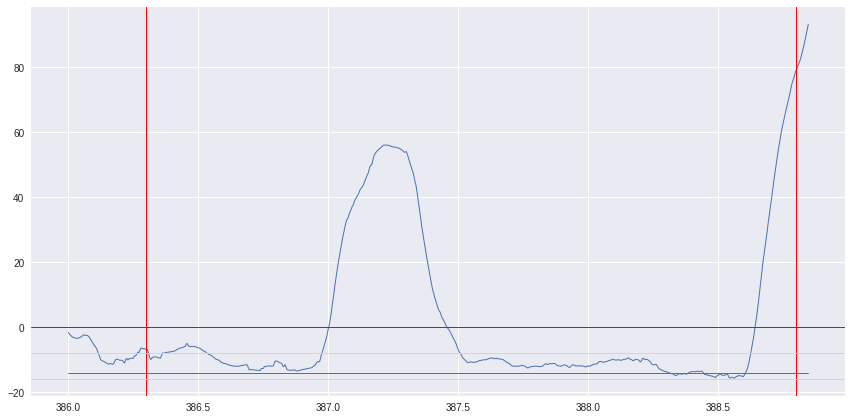

In [6]:
## 386, 388
dpart2 = dd2[(dd2['Time']>386) & (dd2['Time']<388.85)]
xmin, xmax = 386.3, 388.8

g = sns.FacetGrid(data=dpart2, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

g.map(plt.axhline, y=-16, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=-8, alpha=1, linewidth=1, color='pink');


## Applying an new SRB range values

In [7]:
dfV = dpart2.copy()
dfV['SRB'] = (dfV['U'] < -8) & (dfV['U'] > -16)

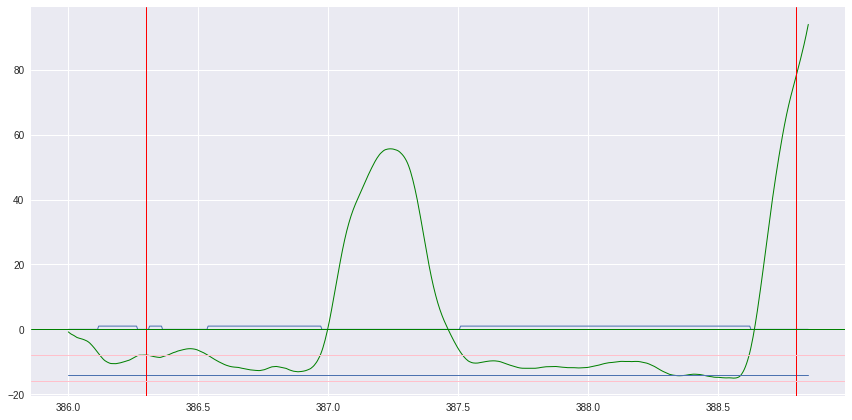

In [8]:
g = sns.FacetGrid(data=dfV, size=6, aspect=2)
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", 'SRB' , alpha=1, linewidth=1);

g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

g.map(plt.axhline, y=-16, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=-8, alpha=1, linewidth=1, color='pink');


In [9]:
print(len(dfV[dfV['SRB']==True]))
print(len(dpart2))

421
684


In [10]:
# dfV['dtime'] = np.where(dfV[dfV['SRB']==True],  dfV['Time'].diff(1), 0) # TODO, rethink the approach

dfSRBtemp = dfV[dfV['SRB']==True]
dfSRBtemp['dtime'] = dfSRBtemp['Time'].diff(1)

/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [11]:
dfSRBtemp.drop(['X_Pos', 'Y_Pos', 'Z_Pos', 'X_Ori', 'Y_Ori', 'Z_Ori','dT'], axis=1, inplace=True)
dfSRBtemp.drop(['lVo', 'lx1', 'lz1', 'V1', 'lx2', 'lz2', 'clockwise', 'theta', 'U', 'UM', 'MotiveExpTimeSecs', 'visible', 'speed', 'subU', 'subUM', 'SRB'], axis=1, inplace=True)


/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
df1 = pd.merge(dfV, dfSRBtemp, on=['Frame', 'session_id','Time'], how='outer')
df1
print(len(dfV))
print(len(df1))

684
684


In [34]:
df1.fillna(0, inplace=True)
times = df1.dtime[df1['dtime']>0.005]
times

75     0.050000
129    0.179167
362    0.537500
Name: dtime, dtype: float64

In [14]:
df1.fillna(0, inplace=True)
# df1.dtime = df1.dtime *10 
# df1[df1['dtime']>0.5]

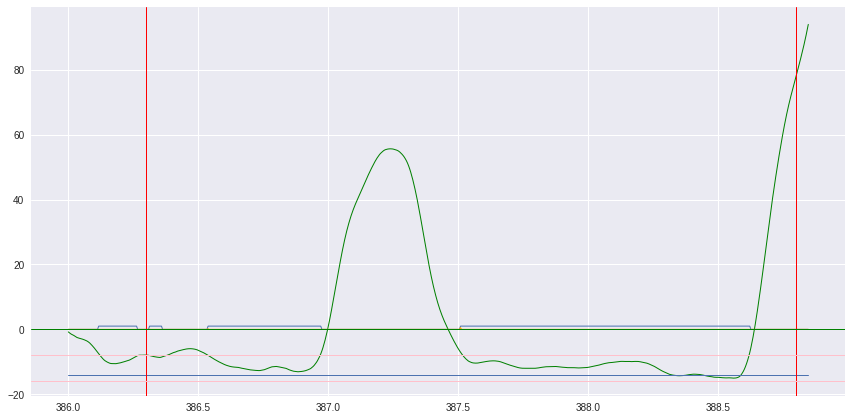

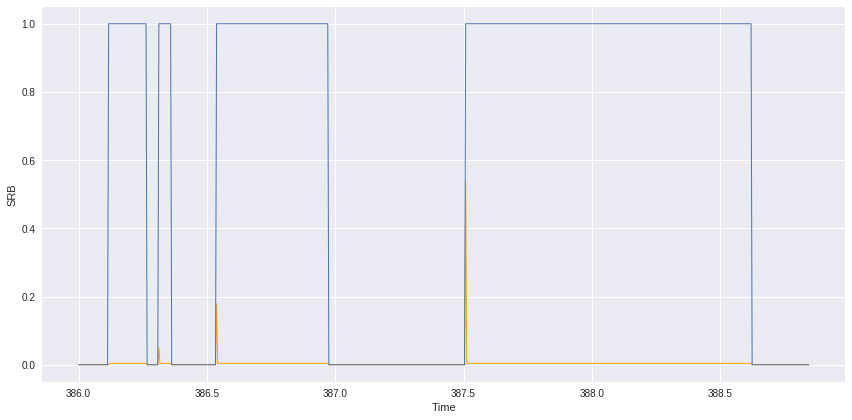

In [26]:
g = sns.FacetGrid(data=df1, size=6, aspect=2)
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", 'SRB' , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "dtime" , alpha=1, linewidth=1, color='orange');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

g.map(plt.axhline, y=-16, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=-8, alpha=1, linewidth=1, color='pink');

g = sns.FacetGrid(data=df1, size=6, aspect=2)
g.map(plt.plot, "Time", "dtime" , alpha=1, linewidth=1, color='orange');
g.map(plt.plot, "Time", "SRB" , alpha=1, linewidth=1);

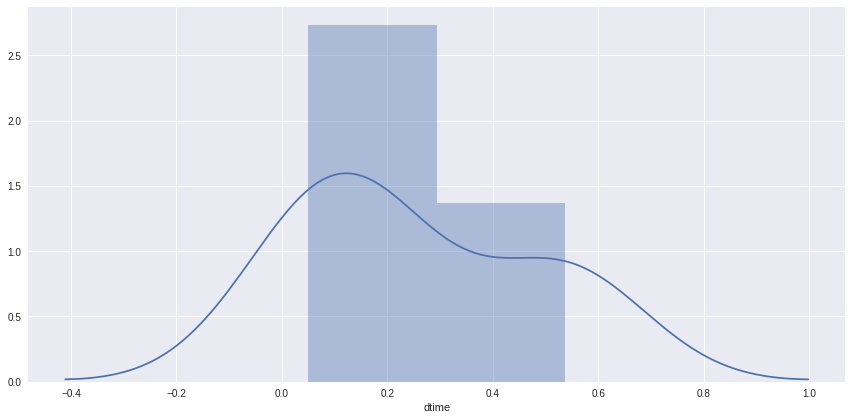

In [35]:
g = sns.FacetGrid(data=dfSRBtemp[dfSRBtemp['dtime']>0.005], size=6, aspect=2)
g.map(sns.distplot, "dtime" );


In [ ]:
df1['SRBnew'] = np.where( (df1['SRB']==True ) | 
    (df1['dtime']>minF), True, False)